In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results = 2, doc_content_chars_max = 500)
arxiv = ArxivQueryRun(api_wrapper = api_wrapper_arxiv, description = "Query Arxiv Papers")

arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [3]:
wikipedia_wrapper_api = WikipediaAPIWrapper(top_k_results = 2, doc_content_chars_max = 500)
wikipedia = WikipediaQueryRun(api_wrapper = wikipedia_wrapper_api, description = "Wikipedia Content")
wikipedia.invoke("Large Language Models")

'Page: Large language model\nSummary: A large language model (LLM) is a language model trained with self-supervised machine learning on a vast amount of text, designed for natural language processing tasks, especially language generation.\nThe largest and most capable LLMs are generative pretrained transformers (GPTs), which are largely used in generative chatbots such as ChatGPT or Gemini. LLMs can be fine-tuned for specific tasks or guided by prompt engineering. These models acquire predictive po'

In [4]:
import os
from dotenv import load_dotenv

GROQ_API_KEY = os.getenv("GROQ_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [5]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()
tavily.invoke("What is the latest news in AI")

C:\Users\M Rishit Varma\AppData\Local\Temp\ipykernel_18796\1591566517.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


[{'title': 'Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai',
  'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
  'content': '**Date:** June 1, 2025  \n**Summary:** Ukraine reportedly used AI-enhanced drone swarms in a covert mission dubbed â\x80\x9cOperation Spider Webâ\x80\x9d to target a Russian bomber. The drones, said to cost as little as the price of an iPhone 16 Pro, represent a new phase of low-cost autonomous warfare. [...] **Date:** May 30, 2025  \n**Summary:** Nvidia CEO Jensen Huang issued a bold warning about the rapid evolution of AI, emphasizing that people who fail to adopt AI in their workflow risk being replaced by those who do. His comments underline the urgency for upskilling in a transforming job market. [...] **Date:** May 31, 2025  \n**Summary:** Monash University has announced a landmark investment in an AI supercomputer, becoming the first higher education institute in Australia to do so. The system will significantly accelerat

In [6]:
# Combine all the tools
tools = [arxiv, wikipedia, tavily]

In [25]:
from langchain_groq import ChatGroq

llm1 = ChatGroq(model = "qwen-qwq-32b", api_key = GROQ_API_KEY)
llm1.invoke("Hi Qwen!")

AIMessage(content='\n<think>\nOkay, the user said "Hi Qwen!" so I should respond in a friendly way. I need to make sure to keep it simple and positive. Maybe start with a greeting back, like "Hello!" then mention that I\'m here to help. I can add an emoji to keep it friendly. Let me check if there\'s anything else to include. Oh, maybe offer assistance with whatever they need. Yeah, that should cover it. Let me put that together.\n\nWait, should I use more than one emoji? Maybe just one is enough. Also, make sure the tone is approachable. Alright, that\'s all. Let me write the response now.\n</think>\n\nHello! 😊 I\'m Qwen, and I\'m here to help you with anything you need. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 165, 'prompt_tokens': 14, 'total_tokens': 179, 'completion_time': 0.379220239, 'prompt_time': 0.002762936, 'queue_time': 0.299697834, 'total_time': 0.381983175}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint

In [23]:
llm2 = ChatGroq(model = "gemma2-9b-it", api_key = GROQ_API_KEY)
llm2.invoke("Hi Gemini!")

AIMessage(content='Hi there! 👋\n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 12, 'total_tokens': 29, 'completion_time': 0.030909091, 'prompt_time': 0.001924677, 'queue_time': 0.24856984299999998, 'total_time': 0.032833768}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--ca4e89e6-f903-4bba-b0dd-529a8c8b8de9-0', usage_metadata={'input_tokens': 12, 'output_tokens': 17, 'total_tokens': 29})

In [26]:
llm_with_tools = llm1.bind_tools(tools = tools)
llm_with_tools.invoke("Get me top latest research papers")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2md203ja1', 'function': {'arguments': '{"query":"latest research papers"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 418, 'prompt_tokens': 268, 'total_tokens': 686, 'completion_time': 1.01627084, 'prompt_time': 0.018748638, 'queue_time': 0.479511851, 'total_time': 1.035019478}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--331e569a-d145-426b-be72-ec9084f21c29-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'latest research papers'}, 'id': '2md203ja1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 268, 'output_tokens': 418, 'total_tokens': 686})

In [33]:
from typing_extensions import TypedDict
from typing import Annotated
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

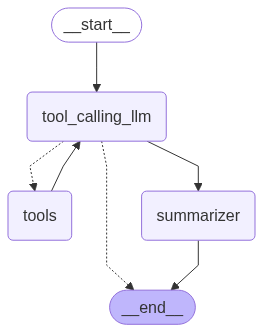

In [ ]:
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition

def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

def summarizer(state:State):
    content = "\n".join([
        m.content for m in state["messages"]
        if isinstance(m, (HumanMessage, AIMessage)) and isinstance(m.content, str)
    ])
    summary = llm2.invoke([HumanMessage(content = f"Please summarize:\n\n{content}")])
    return {"messages": [summary]}

builder = StateGraph(State)

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools",ToolNode(tools))
builder.add_node("summarizer", summarizer)

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",tools_condition)
builder.add_edge("tools","tool_calling_llm")
builder.add_edge("tool_calling_llm","summarizer")

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
messages = graph.invoke({"messages":HumanMessage(content = "Hi Qwen! I am Rishit. What is the latest news in AI and tell me about the latest AI research paper.")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi Qwen! I am Rishit. What is the latest news in AI and tell me about the latest AI research paper.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (h4tah3f6h)
 Call ID: h4tah3f6h
  Args:
    query: latest news in AI
  arxiv (r6czk1j6k)
 Call ID: r6czk1j6k
  Args:
    query: latest AI research paper
================================== Ai Message ==================================

Hi Rishit,

It's great to hear from you! 

AI is constantly evolving, so it's hard to pinpoint *the* latest news.  However, some hot topics right now include:

* **Generative AI:** Models like me are making waves, creating text, images, and even code. Expect to see more applications in creative fields and beyond.
* **AI Safety and Ethics:**  As AI becomes more powerful, concerns about bias, misuse, and unintended consequences are growing. Researchers are wo